In [ ]:
import pandas as pd

# Carga de datasets
df_base_clientes = pd.read_csv('../../../dataset/base_clientes.csv', sep=',')
df_base_consumos = pd.read_csv('../../../dataset/base_consumos.csv', sep=',')
df_base_saldos_creditos = pd.read_csv('../../../dataset/base_saldos_creditos.csv', sep=',')
df_base_saldos_cuentas = pd.read_csv('../../../dataset/base_saldos_cuentas.csv', sep=',')
df_universo = pd.read_csv('../../../dataset/universo.csv', sep=',')

# Verificación rápida
print("Datasets cargados correctamente:")
print(f"base_clientes → {df_base_clientes.shape}")
print(f"base_consumos → {df_base_consumos.shape}")
print(f"base_saldos_creditos → {df_base_saldos_creditos.shape}")
print(f"base_saldos_cuentas → {df_base_saldos_cuentas.shape}")
print(f"universo → {df_universo.shape}")


Datasets cargados correctamente:
base_clientes → (809579, 14)
base_consumos → (3697738, 7)
base_saldos_creditos → (11597785, 8)
base_saldos_cuentas → (8876560, 5)
universo → (535943, 3)


Primero vamos a tomar la base_clientes

## base_clientes

In [ ]:
df_base_clientes.head()

,ID,edad,ingreso,anios_exp,tipo_empleo,buro_de_credito,pago_nomina,tc,prest_per,prest_veh_hip,cuenta_ahorro,ofer_prest_per,ofer_tc,ofer_compra_deuda
0,42af3bf64c2c14307361e970e76c9653df78b215838971...,4.2484,4.1259,0.0,type_2,category_4,4.8095,Yes,No,No,Yes,No,No,No
1,5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926...,4.6903,3.9570,0.0,type_7,category_9,0.0000,No,No,No,Yes,No,No,No
2,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0,type_7,category_5,0.0000,No,No,No,Yes,No,No,No
3,0e48974ce6e81d9e81a8da780521a2f98fb2385dc879df...,3.9651,4.0966,0.0,type_7,category_3,0.0000,Yes,Yes,Yes,Yes,No,No,No
4,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0,type_7,category_5,0.0000,Yes,No,No,Yes,No,No,No


In [ ]:
df_base_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809579 entries, 0 to 809578
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 809579 non-null  object 
 1   edad               809579 non-null  float64
 2   ingreso            809579 non-null  float64
 3   anios_exp          809579 non-null  float64
 4   tipo_empleo        809579 non-null  object 
 5   buro_de_credito    809579 non-null  object 
 6   pago_nomina        809579 non-null  float64
 7   tc                 809579 non-null  object 
 8   prest_per          809579 non-null  object 
 9   prest_veh_hip      809579 non-null  object 
 10  cuenta_ahorro      809579 non-null  object 
 11  ofer_prest_per     809579 non-null  object 
 12  ofer_tc            809579 non-null  object 
 13  ofer_compra_deuda  809579 non-null  object 
dtypes: float64(4), object(10)
memory usage: 86.5+ MB


In [ ]:
df_base_clientes.describe()

,edad,ingreso,anios_exp,pago_nomina
count,809579.000000,809579.000000,809579.000000,809579.000000
mean,4.275201,4.284237,1.333632,1.417533
std,0.377544,0.477204,1.946502,2.017392
min,0.000000,0.000000,0.000000,0.000000
25%,4.001100,4.098200,0.000000,0.000000
50%,4.266700,4.286900,0.000000,0.000000
75%,4.549500,4.509800,3.619300,3.973700
max,5.000000,5.000000,5.000000,5.000000


In [ ]:
df_base_clientes.duplicated().sum() 

np.int64(0)

Creación de nuevas variables derivadas [der_var1_var2]

In [ ]:
df_base_clientes['der_ingreso_por_anio_exp'] = df_base_clientes['ingreso'] / (df_base_clientes['anios_exp'] + 1)
df_base_clientes['der_edad_laboral_relativa'] = df_base_clientes['anios_exp'] / (df_base_clientes['edad'] + 1)


Creación de variables agregadas

Concatenar tablas

In [ ]:
import pandas as pd

# Asegúrate de tener una columna común para hacer el join, por ejemplo 'ID'
# (ajusta 'ID' si el nombre de la llave es diferente)

# 1️⃣ Renombrar las columnas de df_base_clientes (excepto la llave)
df_base_clientes_prefixed = df_base_clientes.rename(
    columns={col: f"DB_CLI_{col}" for col in df_base_clientes.columns if col != 'ID'}
)

# 2️⃣ Realizar el LEFT JOIN con df_universo
df_universo = df_universo.merge(
    df_base_clientes_prefixed,
    on='ID',
    how='left'
)

# 3️⃣ Verificación
print(df_universo.shape)
df_universo.head()


(535943, 18)


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,DB_CLI_prest_per,DB_CLI_prest_veh_hip,DB_CLI_cuenta_ahorro,DB_CLI_ofer_prest_per,DB_CLI_ofer_tc,DB_CLI_ofer_compra_deuda,DB_CLI_der_ingreso_por_anio_exp,DB_CLI_der_edad_laboral_relativa
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.000,type_2,category_6,0.0,No,No,No,Yes,No,No,No,4.652700,0.000000
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.274,type_3,category_4,0.0,No,No,No,Yes,No,No,No,0.804835,0.770423
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2...,0,period_5,4.3600,4.2117,0.000,type_2,category_9,0.0,No,No,No,Yes,No,No,No,4.211700,0.000000
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.000,type_7,category_2,0.0,No,No,No,Yes,Yes,Yes,No,4.158400,0.000000
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7...,0,period_5,4.3077,4.3285,0.000,type_2,category_6,0.0,No,No,No,Yes,No,No,No,4.328500,0.000000


---

## df_base_saldos_cuentas

In [ ]:
df_base_saldos_cuentas.head()

,mes,ID,saldo_ahorros,saldo_otros,periodo
0,11,c7a6cecac361a970ee6c7cb9f2679c38c668940c6ebdc5...,4.1900,0.0,period_5
1,12,68f89dc7efe7cd1ce3cf6d52d8867bd2b84f236736bf91...,4.4621,0.0,period_5
2,2,e3f6afb18792d0b97cb9a63ad9567bbd106146c78d212a...,4.2878,0.0,period_5
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0,period_5
4,7,399d686897232a55c713d61a6bdc7e232ab85b864d6288...,3.8922,0.0,period_5


In [ ]:
df_base_saldos_cuentas.head()

,mes,ID,saldo_ahorros,saldo_otros,periodo
0,11,c7a6cecac361a970ee6c7cb9f2679c38c668940c6ebdc5...,4.1900,0.0,period_5
1,12,68f89dc7efe7cd1ce3cf6d52d8867bd2b84f236736bf91...,4.4621,0.0,period_5
2,2,e3f6afb18792d0b97cb9a63ad9567bbd106146c78d212a...,4.2878,0.0,period_5
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0,period_5
4,7,399d686897232a55c713d61a6bdc7e232ab85b864d6288...,3.8922,0.0,period_5


In [ ]:
df_base_saldos_cuentas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8876560 entries, 0 to 8876559
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mes            int64  
 1   ID             object 
 2   saldo_ahorros  float64
 3   saldo_otros    float64
 4   periodo        object 
dtypes: float64(2), int64(1), object(2)
memory usage: 338.6+ MB


In [ ]:
df_base_saldos_cuentas.describe()

,mes,saldo_ahorros,saldo_otros
count,8.876560e+06,8.876560e+06,8.876560e+06
mean,6.632422e+00,3.140673e+00,6.191672e-01
std,3.448429e+00,1.207045e+00,1.405347e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,2.644100e+00,0.000000e+00
50%,7.000000e+00,3.318500e+00,0.000000e+00
75%,1.000000e+01,3.986700e+00,0.000000e+00
max,1.200000e+01,5.000000e+00,5.000000e+00


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [ ]:
import pandas as pd

# Asegurar orden correcto por mes
df_base_saldos_cuentas = df_base_saldos_cuentas.sort_values(by=['ID', 'mes'], ascending=[True, False])

# -----------------------------
# Agregados de los últimos 2 meses
# -----------------------------
df_dos_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11])]
    .groupby('ID')
    .agg(
        dos_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        dos_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        dos_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        dos_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 3 meses
# -----------------------------
df_tres_meses = (
    df_base_saldos_cuentas[df_base_saldos_cuentas['mes'].isin([12, 11, 10])]
    .groupby('ID')
    .agg(
        tres_meses_max_saldo_ahorros=('saldo_ahorros', 'max'),
        tres_meses_min_saldo_ahorros=('saldo_ahorros', 'min'),
        tres_meses_sum_saldo_ahorros=('saldo_ahorros', 'sum'),
        tres_meses_prom_saldo_ahorros=('saldo_ahorros', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Unir ambos resultados
# -----------------------------
df_agregados_base_saldos_cuentas = pd.merge(df_dos_meses, df_tres_meses, on='ID', how='outer')

# Verificar resultado
print(df_agregados_base_saldos_cuentas.shape)
df_agregados_base_saldos_cuentas.head()


(786340, 9)


,ID,dos_meses_max_saldo_ahorros,dos_meses_min_saldo_ahorros,dos_meses_sum_saldo_ahorros,dos_meses_prom_saldo_ahorros,tres_meses_max_saldo_ahorros,tres_meses_min_saldo_ahorros,tres_meses_sum_saldo_ahorros,tres_meses_prom_saldo_ahorros
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,2.0478,1.9315,3.9793,1.98965,3.2484,1.9315,7.2277,2.409233
1,000043cc1abd7597c99f494cc523ff99a4e0e64e98b128...,3.5701,2.7086,6.2787,3.13935,3.5701,2.7086,9.1865,3.062167
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,3.9865,3.9865,7.9730,3.98650,3.9865,3.9865,11.9595,3.986500
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,4.0610,4.0464,8.1074,4.05370,4.0791,4.0464,12.1865,4.062167
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,3.9150,2.8720,6.7870,3.39350,3.9150,2.8720,9.6760,3.225333


Concatenar tablas

In [ ]:
# 1️⃣ Renombrar columnas de df_base_saldos_cuentas (excepto la llave 'ID')
df_base_saldos_cuentas_prefixed = df_agregados_base_saldos_cuentas.rename(
    columns={col: f"DB_SAL_CUE_{col}" for col in df_agregados_base_saldos_cuentas.columns if col != 'ID'}
)

# 2️⃣ Hacer el LEFT JOIN con df_universo
df_universo = df_universo.merge(
    df_base_saldos_cuentas_prefixed,
    on='ID',
    how='left'
)

# 3️⃣ Verificación
print(df_universo.shape)
df_universo.head()


(535943, 26)


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_CLI_der_ingreso_por_anio_exp,DB_CLI_der_edad_laboral_relativa,DB_SAL_CUE_dos_meses_max_saldo_ahorros,DB_SAL_CUE_dos_meses_min_saldo_ahorros,DB_SAL_CUE_dos_meses_sum_saldo_ahorros,DB_SAL_CUE_dos_meses_prom_saldo_ahorros,DB_SAL_CUE_tres_meses_max_saldo_ahorros,DB_SAL_CUE_tres_meses_min_saldo_ahorros,DB_SAL_CUE_tres_meses_sum_saldo_ahorros,DB_SAL_CUE_tres_meses_prom_saldo_ahorros
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.000,type_2,category_6,0.0,No,...,4.652700,0.000000,3.1754,2.6140,5.7894,2.89470,3.1754,2.6140,8.8493,2.949767
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.274,type_3,category_4,0.0,No,...,0.804835,0.770423,3.2411,3.2254,6.4665,3.23325,3.2955,3.2254,9.7620,3.254000
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2...,0,period_5,4.3600,4.2117,0.000,type_2,category_9,0.0,No,...,4.211700,0.000000,2.7530,2.7090,5.4620,2.73100,3.2891,2.7090,8.7511,2.917033
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.000,type_7,category_2,0.0,No,...,4.158400,0.000000,3.7511,3.7511,7.5022,3.75110,3.7511,3.7511,11.2533,3.751100
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7...,0,period_5,4.3077,4.3285,0.000,type_2,category_6,0.0,No,...,4.328500,0.000000,3.4086,3.3238,6.7324,3.36620,3.4086,3.1789,9.9113,3.303767


In [ ]:
nulos_por_columna = df_universo.isnull().sum()
nulos_por_columna

ID                                              0
target                                          0
periodo                                         0
DB_CLI_edad                                     0
DB_CLI_ingreso                                  0
DB_CLI_anios_exp                                0
DB_CLI_tipo_empleo                              0
DB_CLI_buro_de_credito                          0
DB_CLI_pago_nomina                              0
DB_CLI_tc                                       0
DB_CLI_prest_per                                0
DB_CLI_prest_veh_hip                            0
DB_CLI_cuenta_ahorro                            0
DB_CLI_ofer_prest_per                           0
DB_CLI_ofer_tc                                  0
DB_CLI_ofer_compra_deuda                        0
DB_CLI_der_ingreso_por_anio_exp                 0
DB_CLI_der_edad_laboral_relativa                0
DB_SAL_CUE_dos_meses_max_saldo_ahorros      15564
DB_SAL_CUE_dos_meses_min_saldo_ahorros      15564


___

## df_base_saldos_creditos

In [ ]:
df_base_saldos_creditos.head()

,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo
0,11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab...,type_7,product_2,entity_2,3.4051,5.0,period_5
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5


In [ ]:
df_base_saldos_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11597785 entries, 0 to 11597784
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mes            int64  
 1   ID             object 
 2   tipo_credito   object 
 3   tipo_producto  object 
 4   inst_fin       object 
 5   monto_saldo    float64
 6   dias_atraso    float64
 7   periodo        object 
dtypes: float64(2), int64(1), object(5)
memory usage: 707.9+ MB


In [ ]:
df_base_saldos_creditos.describe()

,mes,monto_saldo,dias_atraso
count,1.159778e+07,1.159778e+07,1.159778e+07
mean,6.673574e+00,3.703500e+00,1.877785e-01
std,3.449925e+00,6.486027e-01,8.981397e-01
min,1.000000e+00,3.000000e-03,0.000000e+00
25%,4.000000e+00,3.292100e+00,0.000000e+00
50%,7.000000e+00,3.703600e+00,0.000000e+00
75%,1.000000e+01,4.142900e+00,0.000000e+00
max,1.200000e+01,5.000000e+00,5.000000e+00


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [ ]:
import pandas as pd

# Asegurar orden correcto por mes
df_base_saldos_creditos = df_base_saldos_creditos.sort_values(by=['ID', 'mes'], ascending=[True, False])

# -----------------------------
# Agregados de los últimos 2 meses (mes 12 y 11)
# -----------------------------
df_dos_meses = (
    df_base_saldos_creditos[df_base_saldos_creditos['mes'].isin([12, 11])]
    .groupby('ID')
    .agg(
        dos_meses_max_monto_saldo=('monto_saldo', 'max'),
        dos_meses_min_monto_saldo=('monto_saldo', 'min'),
        dos_meses_sum_monto_saldo=('monto_saldo', 'sum'),
        dos_meses_prom_monto_saldo=('monto_saldo', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 3 meses (mes 12, 11 y 10)
# -----------------------------
df_tres_meses = (
    df_base_saldos_creditos[df_base_saldos_creditos['mes'].isin([12, 11, 10])]
    .groupby('ID')
    .agg(
        tres_meses_max_monto_saldo=('monto_saldo', 'max'),
        tres_meses_min_monto_saldo=('monto_saldo', 'min'),
        tres_meses_sum_monto_saldo=('monto_saldo', 'sum'),
        tres_meses_prom_monto_saldo=('monto_saldo', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Unir ambos resultados
# -----------------------------
df_agregados_base_saldos_creditos = pd.merge(df_dos_meses, df_tres_meses, on='ID', how='outer')

# Verificar resultado
print(df_agregados_base_saldos_creditos.shape)
df_agregados_base_saldos_creditos.head()


(485195, 9)


,ID,dos_meses_max_monto_saldo,dos_meses_min_monto_saldo,dos_meses_sum_monto_saldo,dos_meses_prom_monto_saldo,tres_meses_max_monto_saldo,tres_meses_min_monto_saldo,tres_meses_sum_monto_saldo,tres_meses_prom_monto_saldo
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,3.1754,3.1754,6.3508,3.1754,3.2202,3.1754,9.5710,3.190333
1,00007a4554cd3a350aec583adebe766eb0beef5684f3dd...,4.1010,2.8456,36.1860,3.6186,4.1019,2.8456,53.9995,3.599967
2,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,3.9005,1.7495,16.4935,3.2987,3.9005,1.7495,26.3618,3.295225
3,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,4.9799,2.7285,23.7864,3.9644,4.9832,2.7285,35.8494,3.983267
4,0000bf7ea0097a88c482e99ab814e6c4c4495b5a35e520...,4.3670,2.7129,45.2352,3.7696,4.3791,2.7129,68.4433,3.802406


Concatenar tablas

In [ ]:
import pandas as pd

# 1️⃣ Renombrar columnas del df_base (excepto la llave ID)
df_base_renamed = df_agregados_base_saldos_creditos.rename(
    columns={col: f"DB_SAL_CRE_{col}" for col in df_agregados_base_saldos_creditos.columns if col != 'ID'}
)

# 2️⃣ INNER JOIN: solo registros que coinciden
df_universo = df_universo.merge(
    df_base_renamed,
    on='ID',
    how='inner'
)

# 3️⃣ Verificación final
print("✅ Dimensiones finales:", df_universo.shape)
print(f"✅ Registros totales después del merge: {len(df_universo)}")
df_universo.head()

✅ Dimensiones finales: (318667, 34)
✅ Registros totales después del merge: 318667


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_SAL_CUE_tres_meses_sum_saldo_ahorros,DB_SAL_CUE_tres_meses_prom_saldo_ahorros,DB_SAL_CRE_dos_meses_max_monto_saldo,DB_SAL_CRE_dos_meses_min_monto_saldo,DB_SAL_CRE_dos_meses_sum_monto_saldo,DB_SAL_CRE_dos_meses_prom_monto_saldo,DB_SAL_CRE_tres_meses_max_monto_saldo,DB_SAL_CRE_tres_meses_min_monto_saldo,DB_SAL_CRE_tres_meses_sum_monto_saldo,DB_SAL_CRE_tres_meses_prom_monto_saldo
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.0000,type_2,category_6,0.0000,No,...,8.8493,2.949767,3.8890,3.5872,7.4762,3.738100,3.8890,3.5872,11.0779,3.692633
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.2740,type_3,category_4,0.0000,No,...,9.7620,3.254000,4.5840,4.5657,9.1497,4.574850,4.5840,4.5298,13.6795,4.559833
2,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.0000,type_7,category_2,0.0000,No,...,11.2533,3.751100,3.2049,3.0596,6.2645,3.132250,3.2049,3.0596,6.2645,3.132250
3,56fe8d95f1af9103e92ce450ece54b4647ccb001a866e6...,1,period_5,4.1613,4.1732,0.0000,type_7,category_6,0.0000,No,...,8.6121,2.870700,3.9545,3.2072,10.4166,3.472200,3.9545,3.0691,13.4857,3.371425
4,f728012da429bb829188103c2cb56ef496a7b7e27360fd...,0,period_5,4.4027,4.3532,4.6727,type_2,category_2,3.6524,Yes,...,13.5525,4.517500,4.4323,3.8368,17.0093,4.252325,4.4323,3.8368,25.2907,4.215117


In [ ]:
df_universo.isnull().sum()

ID                                              0
target                                          0
periodo                                         0
DB_CLI_edad                                     0
DB_CLI_ingreso                                  0
DB_CLI_anios_exp                                0
DB_CLI_tipo_empleo                              0
DB_CLI_buro_de_credito                          0
DB_CLI_pago_nomina                              0
DB_CLI_tc                                       0
DB_CLI_prest_per                                0
DB_CLI_prest_veh_hip                            0
DB_CLI_cuenta_ahorro                            0
DB_CLI_ofer_prest_per                           0
DB_CLI_ofer_tc                                  0
DB_CLI_ofer_compra_deuda                        0
DB_CLI_der_ingreso_por_anio_exp                 0
DB_CLI_der_edad_laboral_relativa                0
DB_SAL_CUE_dos_meses_max_saldo_ahorros      13583
DB_SAL_CUE_dos_meses_min_saldo_ahorros      13583


## df_base_consumos

In [ ]:
df_base_consumos.head()

,periodo,ID,mes,compra_supermercado,compra_restaurante,compra_salud,compra_transporte
0,period_9,a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c...,12,0.0000,0.0000,0.0000,3.9437
1,period_9,0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2...,1,3.7397,3.3499,0.0000,0.0000
2,period_9,a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56...,4,3.6273,3.9726,3.6655,4.4131
3,period_9,8a583965c827c377690b816c90246eaedc499f03a5f25f...,8,3.7855,4.8286,5.0000,4.5094
4,period_9,e53bf4249c7d6d573d532b8b0bad7ffe2fb203a4f00675...,7,2.6077,3.9344,1.3229,3.8061


In [ ]:
df_base_consumos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697738 entries, 0 to 3697737
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   periodo              object 
 1   ID                   object 
 2   mes                  int64  
 3   compra_supermercado  float64
 4   compra_restaurante   float64
 5   compra_salud         float64
 6   compra_transporte    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 197.5+ MB


In [ ]:
df_base_consumos.describe()

,mes,compra_supermercado,compra_restaurante,compra_salud,compra_transporte
count,3.697738e+06,3.697738e+06,3.697738e+06,3.697738e+06,3.697738e+06
mean,6.735978e+00,2.035837e+00,2.505474e+00,1.517864e+00,1.539931e+00
std,3.450599e+00,1.849150e+00,1.734254e+00,1.820631e+00,1.875185e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,2.500800e+00,3.066600e+00,0.000000e+00,0.000000e+00
75%,1.000000e+01,3.703300e+00,3.872100e+00,3.313200e+00,3.458500e+00
max,1.200000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [ ]:
import pandas as pd

# Asegurar orden correcto
df_base_consumos = df_base_consumos.sort_values(by=['ID', 'mes'], ascending=[True, False])

# -----------------------------
# Agregados de los últimos 2 meses (12 y 11)
# -----------------------------
df_dos_meses = (
    df_base_consumos[df_base_consumos['mes'].isin([12, 11])]
    .groupby('ID')
    .agg(
        dos_meses_max_compra_supermercado=('compra_supermercado', 'max'),
        dos_meses_min_compra_supermercado=('compra_supermercado', 'min'),
        dos_meses_sum_compra_supermercado=('compra_supermercado', 'sum'),
        dos_meses_prom_compra_supermercado=('compra_supermercado', 'mean'),

        dos_meses_max_compra_restaurante=('compra_restaurante', 'max'),
        dos_meses_min_compra_restaurante=('compra_restaurante', 'min'),
        dos_meses_sum_compra_restaurante=('compra_restaurante', 'sum'),
        dos_meses_prom_compra_restaurante=('compra_restaurante', 'mean'),

        dos_meses_max_compra_salud=('compra_salud', 'max'),
        dos_meses_min_compra_salud=('compra_salud', 'min'),
        dos_meses_sum_compra_salud=('compra_salud', 'sum'),
        dos_meses_prom_compra_salud=('compra_salud', 'mean'),

        dos_meses_max_compra_transporte=('compra_transporte', 'max'),
        dos_meses_min_compra_transporte=('compra_transporte', 'min'),
        dos_meses_sum_compra_transporte=('compra_transporte', 'sum'),
        dos_meses_prom_compra_transporte=('compra_transporte', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Agregados de los últimos 3 meses (12, 11 y 10)
# -----------------------------
df_tres_meses = (
    df_base_consumos[df_base_consumos['mes'].isin([12, 11, 10])]
    .groupby('ID')
    .agg(
        tres_meses_max_compra_supermercado=('compra_supermercado', 'max'),
        tres_meses_min_compra_supermercado=('compra_supermercado', 'min'),
        tres_meses_sum_compra_supermercado=('compra_supermercado', 'sum'),
        tres_meses_prom_compra_supermercado=('compra_supermercado', 'mean'),

        tres_meses_max_compra_restaurante=('compra_restaurante', 'max'),
        tres_meses_min_compra_restaurante=('compra_restaurante', 'min'),
        tres_meses_sum_compra_restaurante=('compra_restaurante', 'sum'),
        tres_meses_prom_compra_restaurante=('compra_restaurante', 'mean'),

        tres_meses_max_compra_salud=('compra_salud', 'max'),
        tres_meses_min_compra_salud=('compra_salud', 'min'),
        tres_meses_sum_compra_salud=('compra_salud', 'sum'),
        tres_meses_prom_compra_salud=('compra_salud', 'mean'),

        tres_meses_max_compra_transporte=('compra_transporte', 'max'),
        tres_meses_min_compra_transporte=('compra_transporte', 'min'),
        tres_meses_sum_compra_transporte=('compra_transporte', 'sum'),
        tres_meses_prom_compra_transporte=('compra_transporte', 'mean')
    )
    .reset_index()
)

# -----------------------------
# Unir ambos resultados
# -----------------------------
df_agregados_base_consumos = pd.merge(df_dos_meses, df_tres_meses, on='ID', how='outer')

# Verificar resultado
print(df_agregados_base_consumos.shape)
df_agregados_base_consumos.head()


(436740, 33)


,ID,dos_meses_max_compra_supermercado,dos_meses_min_compra_supermercado,dos_meses_sum_compra_supermercado,dos_meses_prom_compra_supermercado,dos_meses_max_compra_restaurante,dos_meses_min_compra_restaurante,dos_meses_sum_compra_restaurante,dos_meses_prom_compra_restaurante,dos_meses_max_compra_salud,...,tres_meses_sum_compra_restaurante,tres_meses_prom_compra_restaurante,tres_meses_max_compra_salud,tres_meses_min_compra_salud,tres_meses_sum_compra_salud,tres_meses_prom_compra_salud,tres_meses_max_compra_transporte,tres_meses_min_compra_transporte,tres_meses_sum_compra_transporte,tres_meses_prom_compra_transporte
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.00000,0.0,...,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,2.6134,2.6134,2.6134,2.6134
1,00007a4554cd3a350aec583adebe766eb0beef5684f3dd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.00000,1.9265,1.9265,1.9265,1.9265,2.8353,2.8353,2.8353,2.8353
2,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,5.0000,5.0000,5.0000,5.0000,0.0000,0.0,0.0000,0.00000,0.0,...,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,0.0000,0.0000,0.0000,0.0000,2.9725,0.0,2.9725,1.48625,0.0,...,2.9725,1.48625,0.0000,0.0000,0.0000,0.0000,2.8355,2.6781,5.5136,2.7568
4,0000c26c7932770cb1af1c74cb7e26da58622c7d835741...,2.7293,2.7293,2.7293,2.7293,0.0000,0.0,0.0000,0.00000,0.0,...,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Concatenar tablas

In [ ]:
import pandas as pd

# 1️⃣ Renombrar columnas (excepto 'ID') para agregar prefijo
df_base_consumos_renamed = df_agregados_base_consumos.rename(
    columns={col: f"DB_CONS_{col}" for col in df_agregados_base_consumos.columns if col != 'ID'}
)

# 2️⃣ INNER JOIN con df_universo
df_universo = df_universo.merge(
    df_base_consumos_renamed,
    on='ID',
    how='inner'
)

# 3️⃣ Verificación final
print("✅ Dimensiones finales:", df_universo.shape)
print(f"✅ Registros totales después del merge: {len(df_universo)}")
df_universo.head()

✅ Dimensiones finales: (194903, 66)
✅ Registros totales después del merge: 194903


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_CONS_tres_meses_sum_compra_restaurante,DB_CONS_tres_meses_prom_compra_restaurante,DB_CONS_tres_meses_max_compra_salud,DB_CONS_tres_meses_min_compra_salud,DB_CONS_tres_meses_sum_compra_salud,DB_CONS_tres_meses_prom_compra_salud,DB_CONS_tres_meses_max_compra_transporte,DB_CONS_tres_meses_min_compra_transporte,DB_CONS_tres_meses_sum_compra_transporte,DB_CONS_tres_meses_prom_compra_transporte
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.0000,type_2,category_6,0.0000,No,...,0.0000,0.000000,3.2834,2.9529,6.2363,3.11815,0.0000,0.000,0.0000,0.0000
1,56fe8d95f1af9103e92ce450ece54b4647ccb001a866e6...,1,period_5,4.1613,4.1732,0.0000,type_7,category_6,0.0000,No,...,7.1692,2.389733,2.0268,0.0000,2.0268,0.67560,1.9083,0.000,1.9083,0.6361
2,a24b0f3338d73d81c1c281fbf77a517b2288924fdc30ba...,0,period_5,4.3364,5.0000,4.5489,type_2,category_2,4.8876,No,...,0.0000,0.000000,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000
3,413e595a556a13551bbcc4f164a2f2e63b0909decbd094...,0,period_5,3.8044,4.2393,0.0000,type_2,category_5,0.0000,Yes,...,3.6069,1.803450,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000
4,b0652801dc333a8a19e24eec35a783ce73f337673100c0...,0,period_5,4.6407,4.0411,0.0000,type_4,category_3,0.0000,No,...,0.0000,0.000000,0.0000,0.0000,0.0000,0.00000,4.0920,4.092,4.0920,4.0920


In [ ]:
len(df_universo)

194903

In [ ]:
df_universo.columns

Index(['ID', 'target', 'periodo', 'DB_CLI_edad', 'DB_CLI_ingreso',
       'DB_CLI_anios_exp', 'DB_CLI_tipo_empleo', 'DB_CLI_buro_de_credito',
       'DB_CLI_pago_nomina', 'DB_CLI_tc', 'DB_CLI_prest_per',
       'DB_CLI_prest_veh_hip', 'DB_CLI_cuenta_ahorro', 'DB_CLI_ofer_prest_per',
       'DB_CLI_ofer_tc', 'DB_CLI_ofer_compra_deuda',
       'DB_CLI_der_ingreso_por_anio_exp', 'DB_CLI_der_edad_laboral_relativa',
       'DB_SAL_CUE_dos_meses_max_saldo_ahorros',
       'DB_SAL_CUE_dos_meses_min_saldo_ahorros',
       'DB_SAL_CUE_dos_meses_sum_saldo_ahorros',
       'DB_SAL_CUE_dos_meses_prom_saldo_ahorros',
       'DB_SAL_CUE_tres_meses_max_saldo_ahorros',
       'DB_SAL_CUE_tres_meses_min_saldo_ahorros',
       'DB_SAL_CUE_tres_meses_sum_saldo_ahorros',
       'DB_SAL_CUE_tres_meses_prom_saldo_ahorros',
       'DB_SAL_CRE_dos_meses_max_monto_saldo',
       'DB_SAL_CRE_dos_meses_min_monto_saldo',
       'DB_SAL_CRE_dos_meses_sum_monto_saldo',
       'DB_SAL_CRE_dos_meses_prom_monto_saldo'

In [ ]:
nulos_por_columna = df_universo.isnull().sum()
nulos_por_columna

ID                                           0
target                                       0
periodo                                      0
DB_CLI_edad                                  0
DB_CLI_ingreso                               0
                                            ..
DB_CONS_tres_meses_prom_compra_salud         0
DB_CONS_tres_meses_max_compra_transporte     0
DB_CONS_tres_meses_min_compra_transporte     0
DB_CONS_tres_meses_sum_compra_transporte     0
DB_CONS_tres_meses_prom_compra_transporte    0
Length: 66, dtype: int64

In [ ]:
import pandas as pd

# Seleccionar solo columnas numéricas
numeric_cols = df_universo.select_dtypes(include=['float64', 'int64']).columns

# DataFrame para almacenar resultados
outlier_summary = []

# Calcular límites IQR y contar outliers (sin modificarlos)
for col in numeric_cols:
    Q1 = df_universo[col].quantile(0.25)
    Q3 = df_universo[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    outliers = ((df_universo[col] < lower_bound) | (df_universo[col] > upper_bound)).sum()
    total = len(df_universo)
    perc = (outliers / total) * 100

    outlier_summary.append({
        'columna': col,
        'outliers': outliers,
        'porcentaje': round(perc, 2)
    })

# Crear DataFrame resumen
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='porcentaje', ascending=False)

print("📊 Resumen de outliers por columna (sin modificar el DataFrame):")
print(outlier_df)


📊 Resumen de outliers por columna (sin modificar el DataFrame):
                                        columna  outliers  porcentaje
48          DB_CONS_tres_meses_min_compra_salud     45557       23.37
43    DB_CONS_tres_meses_max_compra_restaurante     36440       18.70
0                                        target     21234       10.89
8        DB_SAL_CUE_dos_meses_min_saldo_ahorros      6256        3.21
12      DB_SAL_CUE_tres_meses_min_saldo_ahorros      6043        3.10
7        DB_SAL_CUE_dos_meses_max_saldo_ahorros      5952        3.05
13      DB_SAL_CUE_tres_meses_sum_saldo_ahorros      5867        3.01
9        DB_SAL_CUE_dos_meses_sum_saldo_ahorros      5772        2.96
10      DB_SAL_CUE_dos_meses_prom_saldo_ahorros      5551        2.85
11      DB_SAL_CUE_tres_meses_max_saldo_ahorros      5335        2.74
14     DB_SAL_CUE_tres_meses_prom_saldo_ahorros      5222        2.68
20        DB_SAL_CRE_tres_meses_min_monto_saldo      4936        2.53
16         DB_SAL_CRE_dos_

In [ ]:
df_universo = df_universo.drop(columns=[
    'DB_CONS_tres_meses_min_compra_salud',
    'DB_CONS_tres_meses_max_compra_restaurante'
])

In [ ]:
import pandas as pd

# Seleccionar solo columnas numéricas
numeric_cols = df_universo.select_dtypes(include=['float64', 'int64']).columns

# DataFrame para almacenar resultados
outlier_summary = []

# Calcular límites IQR y contar outliers (sin modificarlos)
for col in numeric_cols:
    Q1 = df_universo[col].quantile(0.25)
    Q3 = df_universo[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    outliers = ((df_universo[col] < lower_bound) | (df_universo[col] > upper_bound)).sum()
    total = len(df_universo)
    perc = (outliers / total) * 100

    outlier_summary.append({
        'columna': col,
        'outliers': outliers,
        'porcentaje': round(perc, 2)
    })

# Crear DataFrame resumen
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='porcentaje', ascending=False)

print("📊 Resumen de outliers por columna (sin modificar el DataFrame):")
print(outlier_df)


📊 Resumen de outliers por columna (sin modificar el DataFrame):
                                        columna  outliers  porcentaje
0                                        target     21234       10.89
8        DB_SAL_CUE_dos_meses_min_saldo_ahorros      6256        3.21
12      DB_SAL_CUE_tres_meses_min_saldo_ahorros      6043        3.10
7        DB_SAL_CUE_dos_meses_max_saldo_ahorros      5952        3.05
13      DB_SAL_CUE_tres_meses_sum_saldo_ahorros      5867        3.01
9        DB_SAL_CUE_dos_meses_sum_saldo_ahorros      5772        2.96
10      DB_SAL_CUE_dos_meses_prom_saldo_ahorros      5551        2.85
11      DB_SAL_CUE_tres_meses_max_saldo_ahorros      5335        2.74
14     DB_SAL_CUE_tres_meses_prom_saldo_ahorros      5222        2.68
20        DB_SAL_CRE_tres_meses_min_monto_saldo      4936        2.53
16         DB_SAL_CRE_dos_meses_min_monto_saldo      4477        2.30
18        DB_SAL_CRE_dos_meses_prom_monto_saldo      3164        1.62
22       DB_SAL_CRE_tres_m

In [ ]:
import pandas as pd

# Definir la función de limpieza IQR
def limpiar_outliers_iqr(df, exclude_cols=None):
    """
    Elimina outliers usando el rango intercuartílico (IQR) de todas las columnas numéricas,
    excepto las especificadas en exclude_cols.
    Modifica el DataFrame original.
    """
    if exclude_cols is None:
        exclude_cols = []
    
    numeric_cols = df.select_dtypes(include=['number']).columns.difference(exclude_cols)
    print(f"Columnas numéricas a limpiar: {list(numeric_cols)}\n")

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = len(df)
        
        # Filtramos dentro del rango aceptable
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        after = len(df)
        removed = before - after
        if removed > 0:
            print(f"Columna '{col}': {removed} registros eliminados ({removed/before:.2%})")
    
    return df

# Aplicar limpieza directamente sobre df_universo
print(f"Forma original: {df_universo.shape}")
df_universo = limpiar_outliers_iqr(df_universo, exclude_cols=['target'])
print(f"\nForma después de limpieza: {df_universo.shape}")


Forma original: (194903, 64)
Columnas numéricas a limpiar: ['DB_CLI_anios_exp', 'DB_CLI_der_edad_laboral_relativa', 'DB_CLI_der_ingreso_por_anio_exp', 'DB_CLI_edad', 'DB_CLI_ingreso', 'DB_CLI_pago_nomina', 'DB_CONS_dos_meses_max_compra_restaurante', 'DB_CONS_dos_meses_max_compra_salud', 'DB_CONS_dos_meses_max_compra_supermercado', 'DB_CONS_dos_meses_max_compra_transporte', 'DB_CONS_dos_meses_min_compra_restaurante', 'DB_CONS_dos_meses_min_compra_salud', 'DB_CONS_dos_meses_min_compra_supermercado', 'DB_CONS_dos_meses_min_compra_transporte', 'DB_CONS_dos_meses_prom_compra_restaurante', 'DB_CONS_dos_meses_prom_compra_salud', 'DB_CONS_dos_meses_prom_compra_supermercado', 'DB_CONS_dos_meses_prom_compra_transporte', 'DB_CONS_dos_meses_sum_compra_restaurante', 'DB_CONS_dos_meses_sum_compra_salud', 'DB_CONS_dos_meses_sum_compra_supermercado', 'DB_CONS_dos_meses_sum_compra_transporte', 'DB_CONS_tres_meses_max_compra_salud', 'DB_CONS_tres_meses_max_compra_supermercado', 'DB_CONS_tres_meses_max_c

✅ Variables con al menos una correlación fuerte (|r| > 0.6):
['target', 'DB_CLI_edad', 'DB_CLI_ingreso', 'DB_CLI_anios_exp', 'DB_CLI_pago_nomina', 'DB_CLI_der_ingreso_por_anio_exp', 'DB_CLI_der_edad_laboral_relativa', 'DB_SAL_CUE_dos_meses_max_saldo_ahorros', 'DB_SAL_CUE_dos_meses_min_saldo_ahorros', 'DB_SAL_CUE_dos_meses_sum_saldo_ahorros', 'DB_SAL_CUE_dos_meses_prom_saldo_ahorros', 'DB_SAL_CUE_tres_meses_max_saldo_ahorros', 'DB_SAL_CUE_tres_meses_min_saldo_ahorros', 'DB_SAL_CUE_tres_meses_sum_saldo_ahorros', 'DB_SAL_CUE_tres_meses_prom_saldo_ahorros', 'DB_SAL_CRE_dos_meses_max_monto_saldo', 'DB_SAL_CRE_dos_meses_min_monto_saldo', 'DB_SAL_CRE_dos_meses_sum_monto_saldo', 'DB_SAL_CRE_dos_meses_prom_monto_saldo', 'DB_SAL_CRE_tres_meses_max_monto_saldo', 'DB_SAL_CRE_tres_meses_min_monto_saldo', 'DB_SAL_CRE_tres_meses_sum_monto_saldo', 'DB_SAL_CRE_tres_meses_prom_monto_saldo', 'DB_CONS_dos_meses_max_compra_supermercado', 'DB_CONS_dos_meses_min_compra_supermercado', 'DB_CONS_dos_meses_sum_c

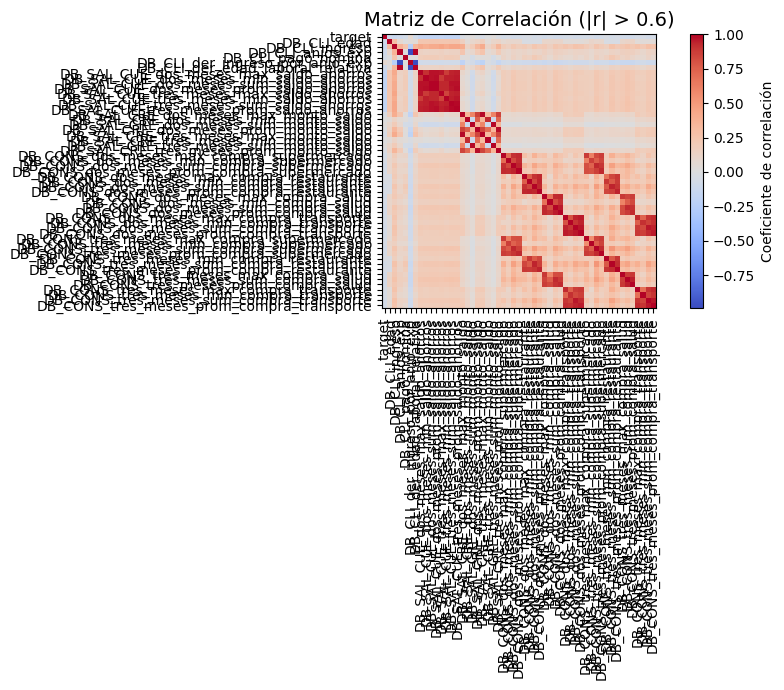

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_df = df_universo.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Encontrar columnas que tengan al menos una correlación fuerte (|r| > 0.6 con otra variable)
strong_corr_cols = corr_matrix.columns[(corr_matrix.abs() > 0.8).any()].tolist()

print("✅ Variables con al menos una correlación fuerte (|r| > 0.6):")
print(strong_corr_cols)

# Crear una submatriz solo con esas variables
corr_strong = corr_matrix.loc[strong_corr_cols, strong_corr_cols]

print("\n📊 MATRIZ DE CORRELACIÓN (solo variables con |r| > 0.6):")
print(corr_strong)

# Visualización
if not corr_strong.empty:
    plt.figure(figsize=(10, 7))
    plt.imshow(corr_strong, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Coeficiente de correlación')
    plt.xticks(range(len(corr_strong.columns)), corr_strong.columns, rotation=90)
    plt.yticks(range(len(corr_strong.columns)), corr_strong.columns)
    plt.title("Matriz de Correlación (|r| > 0.6)", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No se encontraron variables con correlación mayor a 0.6.")


In [ ]:
df_universo.target.value_counts()   

target
0    138509
1      8264
5      3650
3      1742
2       999
4       347
Name: count, dtype: int64